In [20]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

df = pd.read_csv('Cleaned_Mobiles_Dataset.csv')

### A Brand Wise

#### A1 Top Brands by Number of models

In [21]:
top_brands = df['Brand'].value_counts().head(10).reset_index()
top_brands.columns = ['Brand', 'Number of Models']

fig = px.bar(
    top_brands,
    x='Brand',
    y='Number of Models',
    title='Top 10 Brands by Number of Models',
    color='Number of Models',
    color_continuous_scale='reds'
)

fig.update_layout(
    xaxis_title='Brand',
    yaxis_title='Number of Models',
    xaxis_tickangle=-45,
    hovermode='x unified'
)

fig.show()

### A2 Average Discount Price by brand

In [22]:
import plotly.express as px
import pandas as pd

# 1. Data Preparation
avg_discount_price = (
    df.groupby('Brand')['Discount price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
avg_discount_price.columns = ['Brand', 'Avg_Discount_Price']

# 2. Create Horizontal Bar Chart
fig = px.bar(
    avg_discount_price,
    y='Brand',
    x='Avg_Discount_Price',
    orientation='h',
    title='<b>Top 10 Brands by Average Discount Price</b>',
    labels={'Avg_Discount_Price': 'Average Discount Price (₹)'},
    color='Avg_Discount_Price',
    color_continuous_scale=['#4CB5F5', '#BED3E4'],  # Blue gradient
    text='Avg_Discount_Price',
    height=600
)

# 3. Formatting with Pure White Background
fig.update_layout(
    plot_bgcolor='white',  # Pure white plot area
    paper_bgcolor='white',  # Pure white surrounding area
    xaxis=dict(
        showgrid=True,
        gridcolor='#f0f0f0',  # Very light gray gridlines
        title_font=dict(size=14)
    ),
    yaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    xaxis_range=[0, avg_discount_price['Avg_Discount_Price'].max() * 1.15],  # 15% extra space
    margin=dict(l=150, r=50, t=80, b=50),
    title_font=dict(size=18, color='#333333'),
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        font_family="Arial",
        bordercolor='#ddd'
    )
)

# 4. Bar Styling
fig.update_traces(
    texttemplate='₹%{x:,.0f}',  # No decimals for cleaner look
    textposition='outside',
    marker_line_color='#666666',
    marker_line_width=1,
    width=0.7,
    textfont=dict(color='#333333', size=11)
)

# 5. The Red Dotted Line Explained (Industry Benchmark)
overall_avg = df['Discount price'].mean()
fig.add_vline(
    x=overall_avg,
    line_dash="dot",
    line_color="#FF0000",  # Bright red
    line_width=2,
    annotation_text=f'Industry Average: ₹{overall_avg:,.0f}',
    annotation_position="top right",
    annotation_font=dict(color="#FF0000"),
    annotation_bgcolor="rgba(255,255,255,0.8)"
)

# 6. Display
fig.show(config={'displayModeBar': True})

### A3 Brand-Wise Discount Percentage Comparison

In [23]:
# 1. Calculate Discount Percentage
df['Discount %'] = ((df['Actual price'] - df['Discount price']) / df['Actual price']) * 100

# 2. Prepare Data
avg_discount_pct = (
    df.groupby('Brand')['Discount %']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
avg_discount_pct.columns = ['Brand', 'Avg_Discount_Pct']

# 3. Create Interactive Horizontal Bar Chart
fig = px.bar(
    avg_discount_pct,
    y='Brand',
    x='Avg_Discount_Pct',
    orientation='h',
    title='<b>Top 10 Brands by Average Discount Percentage</b>',
    labels={'Avg_Discount_Pct': 'Discount %'},
    color='Avg_Discount_Pct',
    color_continuous_scale=['#2ecc71', '#27ae60'],  # Green gradient
    text='Avg_Discount_Pct',
    height=600
)

# 4. Professional Formatting
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        title='Average Discount %',
        showgrid=True,
        gridcolor='#f0f0f0',
        range=[0, avg_discount_pct['Avg_Discount_Pct'].max() * 1.1],  # 10% buffer
        ticksuffix='%'  # Add % to x-axis values
    ),
    yaxis=dict(
        title='Brand',
        autorange='reversed'  # Highest discount on top
    ),
    margin=dict(l=150, r=50, t=80, b=50),
    title_font=dict(size=18, color='#333333'),
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        bordercolor='#ddd'
    ),
    coloraxis_showscale=False
)

# 5. Smart Text Handling
fig.update_traces(
    texttemplate='%{x:.1f}%',  # 1 decimal place with %
    textposition=[
        'inside' if (pct > avg_discount_pct['Avg_Discount_Pct'].quantile(0.75)) 
        else 'outside' 
        for pct in avg_discount_pct['Avg_Discount_Pct']
    ],
    textfont_color=[
        'white' if (pct > avg_discount_pct['Avg_Discount_Pct'].quantile(0.75)) 
        else '#333333' 
        for pct in avg_discount_pct['Avg_Discount_Pct']
    ],
    marker_line_color='#666666',
    marker_line_width=1,
    width=0.7
)

# 6. Add Industry Benchmark
industry_avg = df['Discount %'].mean()
fig.add_vline(
    x=industry_avg,
    line_dash="dot",
    line_color="#e74c3c",
    line_width=2,
    annotation_text=f'Industry Avg: {industry_avg:.1f}%',
    annotation_position="top right",
    annotation_font=dict(color="#e74c3c"),
    annotation_bgcolor="rgba(255,255,255,0.8)"
)

# 7. Display
fig.show(config={'displayModeBar': True})

### Model Wise EDA


#### B1 Top 10 most expensive models

In [24]:
# 1. Prepare Data
top_expensive = (
    df.sort_values(by='Actual price', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

# 2. Create Interactive Horizontal Bar Chart
fig = px.bar(
    top_expensive,
    y='Product Name',
    x='Actual price',
    orientation='h',
    title='<b>Top 10 Most Expensive Mobile Models</b>',
    labels={'Actual price': 'Price (₹)'},
    color='Actual price',
    color_continuous_scale=['#ff9999', '#ff4d4d', '#cc0000'],  # Red gradient
    text='Actual price',
    hover_data={'Brand': True, 'Discount price': True},
    height=700  # Extra height for model names
)

# 3. Professional Formatting
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        title='Price (₹)',
        showgrid=True,
        gridcolor='#f0f0f0',
        tickprefix='₹',
        range=[0, top_expensive['Actual price'].max() * 1.05]  # 5% buffer
    ),
    yaxis=dict(
        title='Model',
        autorange='reversed',  # Most expensive on top
        tickfont=dict(size=12)
    ),
    margin=dict(l=200, r=50, t=80, b=50),  # Extra left margin
    title_font=dict(size=20, color='#333333'),
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        bordercolor='#ddd'
    )
)

# 4. Smart Text Handling
fig.update_traces(
    texttemplate='₹%{x:,.0f}',
    textposition='auto',
    marker_line_color='#660000',
    marker_line_width=1,
    width=0.8,
    textfont=dict(color='#333333', size=9)
)

# 5. Add Brand Information
fig.update_traces(
    customdata=top_expensive[['Brand', 'Discount price']],
    hovertemplate=(
        "<b>%{y}</b><br>"
        "Brand: %{customdata[0]}<br>"
        "Actual Price: ₹%{x:,.0f}<br>"
        "Discount Price: ₹%{customdata[1]:,.0f}<extra></extra>"
    )
)

# 6. Display with Indian Rupee Formatting
fig.show(config={
    'displayModeBar': True,
    'locale': 'en-IN'  # Indian number formatting
})

#### B2 Top 10 Mobile Models by Star Ratings

In [25]:
# Get top 10 models by star rating
top_rated = df.sort_values(by='Stars', ascending=False).drop_duplicates('Product Name').head(10)

# Create interactive plot
fig = px.bar(top_rated,
             x='Stars',
             y='Product Name',
             orientation='h',
             title='<b>Top 10 Highest Rated Mobile Models</b>',
             color='Stars',
             color_continuous_scale='Tealgrn',
             text='Stars',
             hover_data={'Stars': ':.1f', 'Product Name': True},
             height=600)

# Customize layout
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    xaxis_title='<b>Star Rating</b>',
    yaxis_title=None,
    xaxis_range=[0, 5],
    plot_bgcolor='rgba(0,0,0,0)',
    title_font_size=20,
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
    )
)

# Customize bars and text
fig.update_traces(
    texttemplate='%{text:.1f}',
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>Rating: %{x:.1f} stars<extra></extra>',
    marker_line_color='rgb(8,48,107)',
    marker_line_width=0.5
)

# Show the plot
fig.show()

#### B3 Top 10 Most Reviewed Mobile Models

In [26]:
import plotly.express as px

# Get top 10 reviewed models
top_reviewed = df.sort_values(by='Reviews', ascending=False).drop_duplicates('Product Name').head(10)

# Create interactive plot
fig = px.bar(top_reviewed,
             x='Reviews',
             y='Product Name',
             orientation='h',
             title='<b>Top 10 Most Reviewed Mobile Models</b>',
             color='Reviews',
             color_continuous_scale='Blues',
             text='Reviews',
             hover_data={'Reviews': ':,.0f', 'Product Name': True},
             height=600)

# Customize layout
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    xaxis_title='<b>Number of Reviews</b>',
    yaxis_title=None,
    plot_bgcolor='rgba(0,0,0,0)',
    title_font_size=20,
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
    ),
    # Format x-axis to show thousands with comma separator
    xaxis=dict(
        tickformat=',.0f'
    )
)

# Customize bars and text
fig.update_traces(
    texttemplate='%{text:,.0f}',
    textposition='auto',
    hovertemplate='<b>%{y}</b><br>Reviews: %{x:,.0f}<extra></extra>',
    marker_line_color='rgb(8,48,107)',
    marker_line_width=0.5
)

# Show the plot
fig.show()

#### B4 Brand Wise Segment Distribution

In [27]:
import plotly.express as px

# Prepare data (same as before)
all_brands = df['Brand'].value_counts().head(23).index
df_all_brands = df[df['Brand'].isin(all_brands)]
brand_segment = pd.crosstab(df_all_brands['Brand'], df_all_brands['Segment'])
brand_segment = brand_segment.sort_values(by='Flagship', ascending=False)

# Reset index for Plotly
brand_segment = brand_segment.reset_index().melt(id_vars='Brand', var_name='Segment', value_name='Count')

# Define a professional color scheme (adjust as needed)
segment_colors = {
    "Flagship": "#4E79A7",  # Deep blue (Premium)
    "Mid Range": "#59A14F",  # Green (Balanced)
    "Budget": "#F28E2B",     # Orange (Affordable)
}

# Create interactive plot
fig = px.bar(
    brand_segment,
    x="Brand",
    y="Count",
    color="Segment",
    title="<b>Brand-wise Distribution Across Price Segments</b>",
    color_discrete_map=segment_colors,  # Apply custom colors
    height=600,
    width=1000,
    template="plotly_white",  # Clean white background
)

# Customize layout
fig.update_layout(
    barmode="stack",
    xaxis_title="<b>Brand</b>",
    yaxis_title="<b>Number of Models</b>",
    plot_bgcolor="rgba(255,255,255,1)",  # Pure white background
    paper_bgcolor="rgba(255,255,255,1)",  # No gray borders
    title_font_size=20,
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial",
    ),
    legend_title_text="<b>Price Segment</b>",
    xaxis=dict(tickangle=45, showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),  # Light gridlines for readability
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    font=dict(family="Arial", size=12),  # Consistent font
)

# Customize bars & hover
fig.update_traces(
    hovertemplate="<b>%{x}</b><br>Segment: %{fullData.name}<br>Models: %{y}<extra></extra>",
    marker_line_width=0.3,
    marker_line_color="white",  # Subtle white borders for segment separation
    opacity=0.9,  # Slightly transparent for modern look
)

# Add interactivity
fig.update_layout(
    hovermode="x unified",  # Shows all segments on hover
    xaxis=dict(showspikes=True, spikemode="across"),  # Hover guides
)

# Show the plot
fig.show()

### Feature Wise EDA


#### RAM vs Price

In [28]:
import plotly.express as px

fig = px.box(
    df,
    x='RAM (GB)',
    y='Actual price',
    title='Boxplot: Actual Price by RAM Size',
    labels={'RAM (GB)': 'RAM (GB)', 'Actual price': 'Actual Price (INR)'},
    color='RAM (GB)',  # Optional: color per RAM size
    template='plotly_white'
)

fig.update_layout(title_font_size=20, title_x=0.5)
fig.show()


### Storage vs Actual Price

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df['Storage (GB)'], df['Actual price'], alpha=0.6, color='darkorange')
plt.title('Storage vs Actual Price')
plt.xlabel('Storage (GB)')
plt.ylabel('Actual Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

### Primary Camera Vs Actual Price

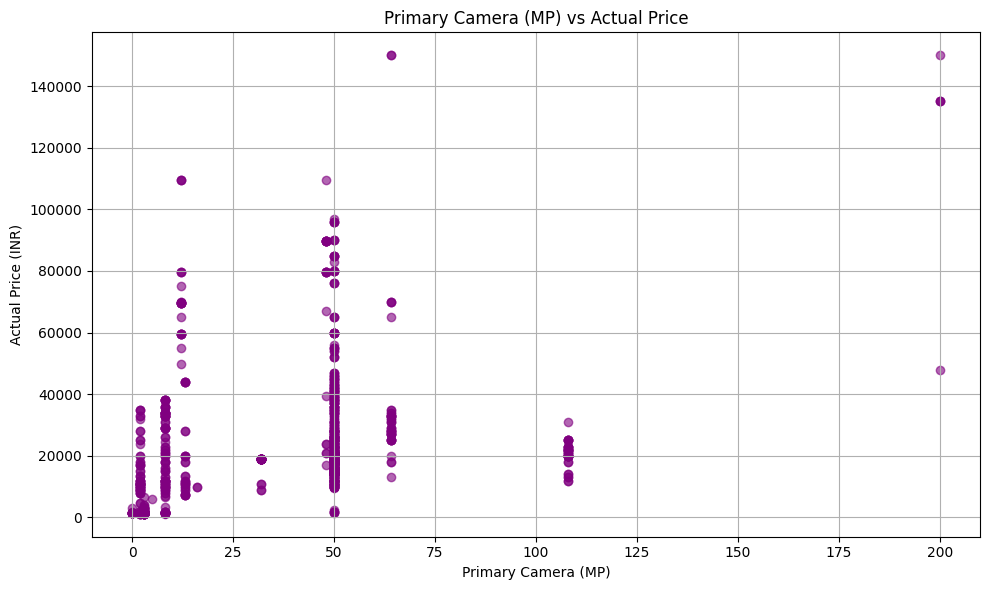

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Primary Camera (MP)'], df['Actual price'], alpha=0.6, color='purple')
plt.title('Primary Camera (MP) vs Actual Price')
plt.xlabel('Primary Camera (MP)')
plt.ylabel('Actual Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()


### D. Distribution & Correlation

#### Price Distribution

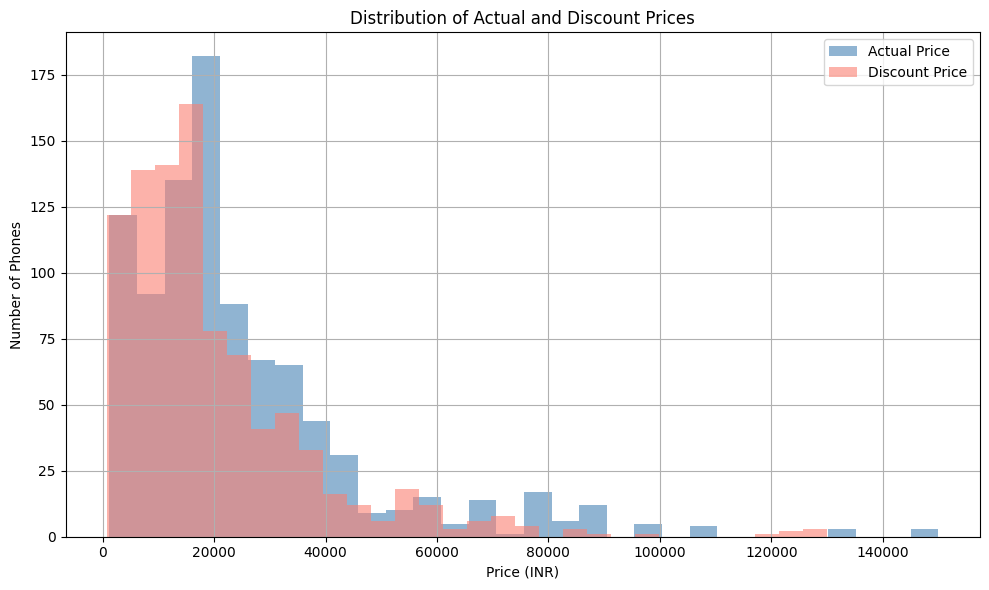

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df['Actual price'], bins=30, alpha=0.6, label='Actual Price', color='steelblue')
plt.hist(df['Discount price'], bins=30, alpha=0.6, label='Discount Price', color='salmon')
plt.title('Distribution of Actual and Discount Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Number of Phones')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Correlation heatmap

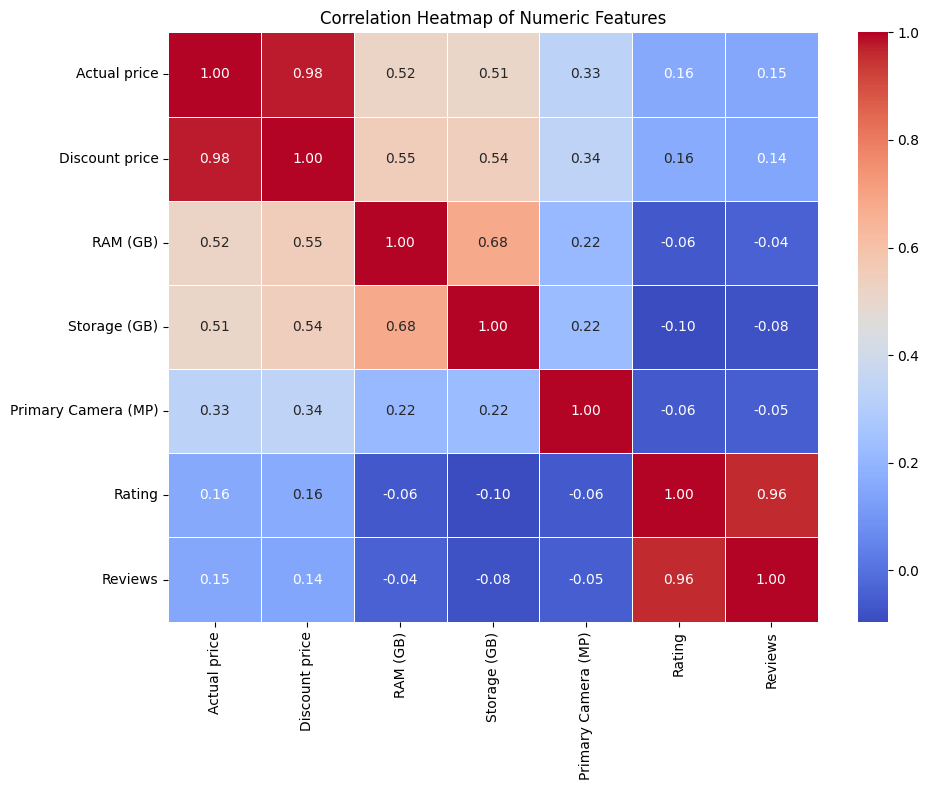

In [ ]:
import seaborn as sns

# Select numeric columns
numeric_cols = df[['Actual price', 'Discount price', 'RAM (GB)', 'Storage (GB)', 'Primary Camera (MP)', 'Rating', 'Reviews']]

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()
